# Cartographie avec R et ggplot

In [11]:
setwd("./Desktop/TD/")

In [21]:
library(ggplot2)
library(rgdal)
library(maptools)
library(plyr)

In [14]:
GEOFLA <- readOGR("./COMMUNE/COMMUNE.shp")
data <- read.csv("./indicateurs_pourR.csv", sep = ";")

OGR data source with driver: ESRI Shapefile 
Source: "./COMMUNE/COMMUNE.shp", layer: "COMMUNE"
with 36571 features
It has 18 fields
Integer64 fields read as strings:  SUPERFICIE POPULATION 


In [15]:
GEOFLAsub <- merge(GEOFLA, data, 
                by.x = "INSEE_COM", 
                by.y = "code_insee", 
                all.x = FALSE)

In [16]:
GEOFLAsub@data$id = rownames(GEOFLAsub@data)

In [17]:
GEOFLApoly <- fortify(GEOFLAsub)

Regions defined for each Polygons


In [22]:
GEOFLAggplot <- join(GEOFLApoly, GEOFLAsub@data, by="id")

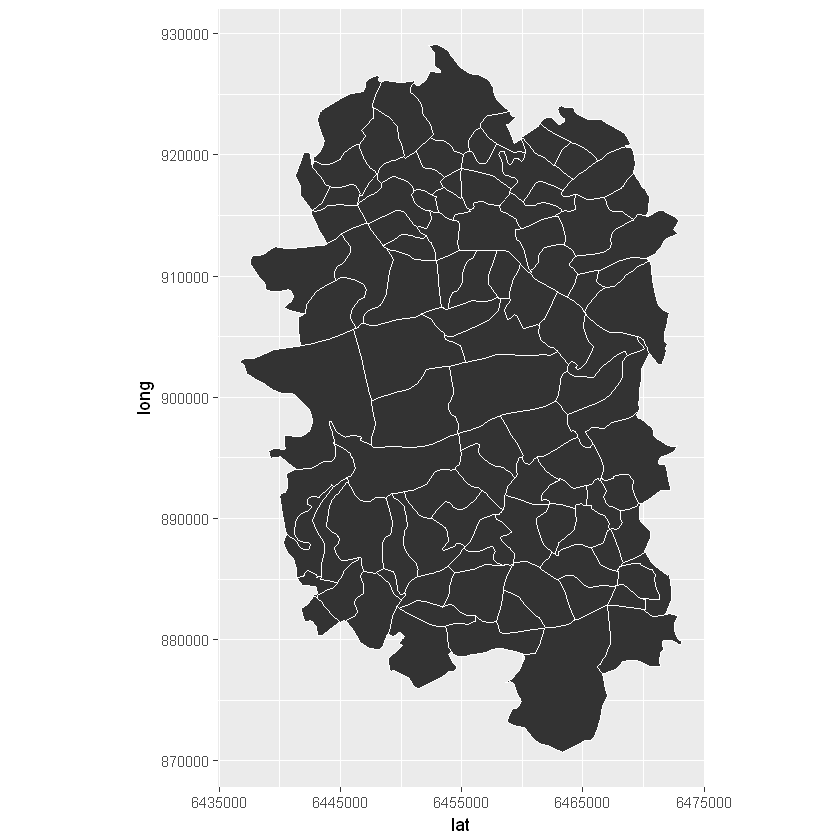

In [41]:
ggplot(GEOFLAggplot) +
  aes(x=lat, y=long, group=id) +
  geom_polygon() +
  geom_path(color="white") +
  coord_equal()

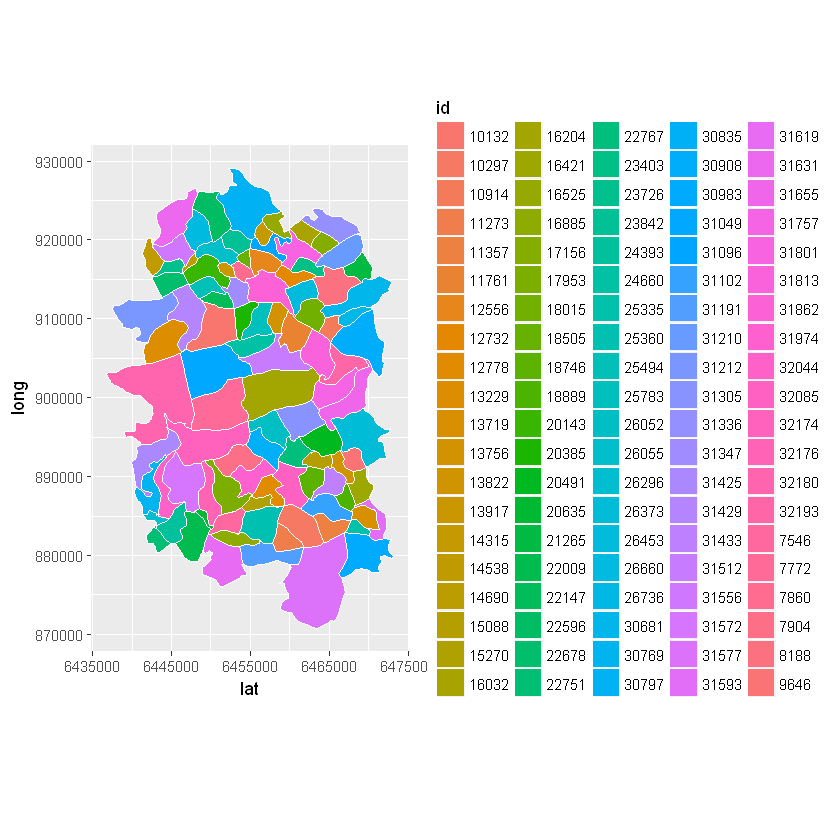

In [42]:
ggplot(GEOFLAggplot) +
  aes(x=lat, y=long, group=id, fill=id) +
  geom_polygon() +
  geom_path(color="white") +
  coord_equal()

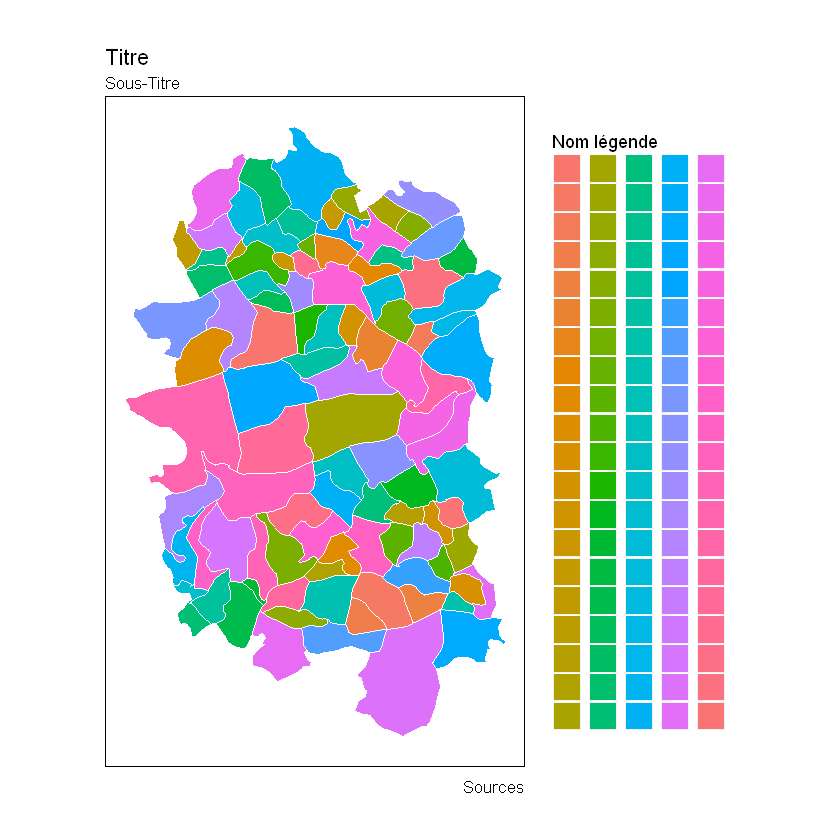

In [66]:
ggplot(GEOFLAggplot) + 
  aes(x=lat, y=long, group=id, fill=id) +
  geom_polygon() +
  geom_path(color="white") +
  coord_equal() +
  theme(
    # Tracé des axes X et Y
    axis.line = element_blank(),
    # Valeurs des axes
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    # Nom des axes
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    # Grille
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    # Fond
    panel.background = element_blank(),
    panel.border = element_rect(
        fill=NA
    ),
    plot.margin = margin(1,1,1,1, unit = "cm")
  ) + 
  labs(
      title = "Titre", 
      subtitle = "Sous-Titre", 
      caption = "Sources"
  ) +
 scale_fill_discrete(
     name = "Nom légende",
     labels = NULL,
     position = "left"
 )

### Pour aller plus loin

[Cartographie](https://timogrossenbacher.ch/2016/12/beautiful-thematic-maps-with-ggplot2-only/)

[Cartographie 2](https://github.com/tidyverse/ggplot2/wiki/plotting-polygon-shapefiles)

[Documentation de ggplot](http://ggplot2.tidyverse.org/reference/index.html)